# Desafio prático do módulo 01 do Bootcamp de Arquiteto de Big Data

### Importando bibliotecas

In [1]:
# Importando bibliotecas essenciais para manipulação e análise de dados
import pandas as pd
import numpy as np

# Importando bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go  # Criar e concatenar gráficos

# Importando bibliotecas para pré-processamento e machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

### Funções de Carregamento e Verificação

#### Estados

In [2]:
try:
    estados = pd.read_csv('estado_regiao.csv', sep=';', encoding='latin-1')
    print('Arquivo carregado com sucesso!')
except FileNotFoundError:
    print('Arquivo não encontrado!')
except Exception as e:
    print(f'Ocorreu um erro: {e}')

Arquivo carregado com sucesso!


#### Pacientes

In [3]:
try:
    pacientes = pd.read_csv('dados_pacientes.csv', sep=';')
    print('Arquivo carregado com sucesso!')
except FileNotFoundError:
    print('Arquivo não encontrado!')
except Exception as e:
    print(f'Ocorreu um erro: {e}')

Arquivo carregado com sucesso!


#### Dados clínicos

In [4]:
try:
    clinica = pd.read_csv('dados_clinicos.csv', sep=';')
    print('Arquivo carregado com sucesso!')
except FileNotFoundError:
    print('Arquivo não encontrado!')
except Exception as e:
    print(f'Ocorreu um erro: {e}')

Arquivo carregado com sucesso!


### Explorando o dataset

#### <span style="font-size:20px; color:#00FFFF; font-weight:bold;">Estados</span>



In [5]:
estados.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [6]:
estados.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [7]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_estado  27 non-null     int64 
 1   sigla      27 non-null     object
 2   estado     27 non-null     object
 3   regiao     27 non-null     object
 4   pais       27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [8]:
estados.isna().sum()

id_estado    0
sigla        0
estado       0
regiao       0
pais         0
dtype: int64

#### <span style="font-size:20px; color:#00FFFF; font-weight:bold;">Pacientes</span>


In [9]:
pacientes.head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430


In [10]:
pacientes.describe()

,id_cliente,idade,id_estado,qtde_filhos,salario
count,7999.000000,7999.000000,7999.000000,7989.000000,7999.000000
mean,4000.000000,38.477060,14.094012,2.405432,3169.312664
std,2309.256735,13.568667,7.821634,1.703916,3055.862493
min,1.000000,17.000000,1.000000,0.000000,0.000000
25%,2000.500000,28.000000,7.000000,1.000000,1100.000000
50%,4000.000000,37.000000,14.000000,2.000000,2410.000000
75%,5999.500000,47.000000,21.000000,4.000000,3640.500000
max,7999.000000,90.000000,27.000000,5.000000,19994.000000


In [11]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       7999 non-null   int64  
 1   idade            7999 non-null   int64  
 2   classe_trabalho  7612 non-null   object 
 3   escolaridade     7999 non-null   object 
 4   id_estado        7999 non-null   int64  
 5   estado_civil     7999 non-null   object 
 6   raca             7999 non-null   object 
 7   qtde_filhos      7989 non-null   float64
 8   salario          7999 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 562.6+ KB


In [12]:
pacientes.isna().sum()

id_cliente           0
idade                0
classe_trabalho    387
escolaridade         0
id_estado            0
estado_civil         0
raca                 0
qtde_filhos         10
salario              0
dtype: int64

#### <span style="font-size:20px; color:#00FFFF; font-weight:bold;">Dados Clínicos</span>


In [13]:
clinica.head()

,id_cliente,peso,colesterol,genero
0,1,102.0,111,Masculino
1,2,115.0,135,Masculino
2,3,115.0,136,Masculino
3,4,140.0,167,Feminino
4,5,130.0,158,Masculino


In [14]:
clinica.describe()

,id_cliente,peso,colesterol
count,590.000000,585.000000,590.000000
mean,283.696610,143.158974,170.067797
std,156.464182,30.925402,39.325409
min,1.000000,95.000000,102.000000
25%,148.250000,116.000000,135.250000
50%,295.500000,140.000000,169.000000
75%,424.750000,171.000000,207.750000
max,547.000000,203.000000,235.000000


In [15]:
clinica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  590 non-null    int64  
 1   peso        585 non-null    float64
 2   colesterol  590 non-null    int64  
 3   genero      590 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 18.6+ KB


In [16]:
clinica.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
dtype: int64

### Tratamento dos dados

#### <span style="font-size:20px; color:#00FFFF; font-weight:bold;">Dados Clínicos</span>

##### Head()

In [17]:
# Visualizar topo da tabela
clinica.head()

,id_cliente,peso,colesterol,genero
0,1,102.0,111,Masculino
1,2,115.0,135,Masculino
2,3,115.0,136,Masculino
3,4,140.0,167,Feminino
4,5,130.0,158,Masculino


##### Valores ausentes

In [18]:
# Procurar por NAN
clinica.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
dtype: int64

##### Valores duplicados

In [19]:
# Procurando por registros duplicados
num_duplicados = clinica.duplicated().sum()
print(f"Número de linhas duplicadas: {num_duplicados}")

Número de linhas duplicadas: 43


##### Removendo os NAN


In [20]:
# coluna que está o NAN
clinica = clinica.dropna(subset=['peso'])
clinica.count()

id_cliente    585
peso          585
colesterol    585
genero        585
dtype: int64

##### Removendo as duplicatas


In [21]:
clinica = clinica.drop_duplicates(
    subset='id_cliente',
    keep='first'
)

clinica_sem_duplicatas = clinica
num_duplicados = clinica_sem_duplicatas.duplicated().sum()
print(f"Número de linhas duplicadas: {num_duplicados}")

Número de linhas duplicadas: 0


#### <span style="font-size:20px; color:#00FFFF; font-weight:bold;">Pacientes</span>


##### Valores Nulos

In [22]:
pacientes.isna().sum()

id_cliente           0
idade                0
classe_trabalho    387
escolaridade         0
id_estado            0
estado_civil         0
raca                 0
qtde_filhos         10
salario              0
dtype: int64

##### Usando Moda (Mode) para preencher os valores nulos

In [23]:
# Calcular a moda de cada coluna
moda_classe_trabalho = pacientes['classe_trabalho'].mode().iloc[0]
moda_qtde_filhos = pacientes['qtde_filhos'].mode().iloc[0]

In [24]:
# Preenchendo os valores ausentes com a moda
#pacientes['classe_trabalho'].fillna(moda_classe_trabalho, inplace= True)
pacientes.fillna({'classe_trabalho': moda_classe_trabalho}, inplace=True)

#pacientes['qtde_filhos'].fillna(moda_qtde_filhos, inplace= True)
pacientes.fillna({'qtde_filhos': moda_qtde_filhos}, inplace= True)

In [25]:
pacientes.isna().sum()

id_cliente         0
idade              0
classe_trabalho    0
escolaridade       0
id_estado          0
estado_civil       0
raca               0
qtde_filhos        0
salario            0
dtype: int64

#### <span style="font-size:20px; color:#FFDF00; font-weight:bold;">Adicionando coluna genero_number</span>

In [26]:
LE = LabelEncoder()
clinica_sem_duplicatas['genero_number'] = LE.fit_transform(clinica_sem_duplicatas['genero'])
clinica_sem_duplicatas

,id_cliente,peso,colesterol,genero,genero_number
0,1,102.0,111,Masculino,1
1,2,115.0,135,Masculino,1
2,3,115.0,136,Masculino,1
3,4,140.0,167,Feminino,0
4,5,130.0,158,Masculino,1
...,...,...,...,...,...
542,543,172.0,207,Masculino,1
543,544,129.0,157,Masculino,1
544,545,107.0,115,Masculino,1
545,546,117.0,147,Masculino,1


### Integração dos arquivos e dados

<span style="font-size:20px; color:#FFDF00; font-weight:bold;">Verificação do topo dos arquivos</span>


In [27]:
estados[:3]

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil


In [28]:
pacientes[:3]

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100


In [29]:
clinica_sem_duplicatas[:3]

,id_cliente,peso,colesterol,genero,genero_number
0,1,102.0,111,Masculino,1
1,2,115.0,135,Masculino,1
2,3,115.0,136,Masculino,1


<span style="font-size:20px; color:#FFDF00; font-weight:bold;">Unindo os arquivos</span>


In [30]:
# Configurando o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)


In [31]:
# Unindo os arquivos 'dados_pacientes.csv' e 'estado_regiao.csv'
paciente_estados = pd.merge(pacientes, estados, on='id_estado')
paciente_estados.sort_values('id_cliente')

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,AL,Alagoas,Nordeste,Brasil
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,SC,Santa Catarina,Sul,Brasil
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,AM,Amazonas,Norte,Brasil
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,SC,Santa Catarina,Sul,Brasil
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,PB,Paraíba,Nordeste,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,7995,23,Funcionário Setor Privado,Ensino Médio Completo,7,Casado,Negro,3.0,2856,DF,Distrito Federal,Centro-Oeste,Brasil
7995,7996,19,Funcionário Setor Privado,Ensino Médio Incompleto,5,Solteiro,Branco,1.0,1100,BA,Bahia,Nordeste,Brasil
7996,7997,44,Funcionário Setor Privado,Ensino Médio Completo,23,Casado,Branco,0.0,3729,RR,Roraima,Norte,Brasil
7997,7998,20,Funcionário Setor Privado,Ensino Médio Incompleto,8,Solteiro,Negro,0.0,1100,ES,Espírito Santo,Sudeste,Brasil


In [32]:
# Unindo em base_completa: 'pacientes_estados' e 'dados_clinicos.csv'
base_completa = pd.merge(paciente_estados, clinica, on='id_cliente')
base_completa

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais,peso,colesterol,genero,genero_number
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,AL,Alagoas,Nordeste,Brasil,102.0,111,Masculino,1
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,SC,Santa Catarina,Sul,Brasil,115.0,135,Masculino,1
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,AM,Amazonas,Norte,Brasil,115.0,136,Masculino,1
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,SC,Santa Catarina,Sul,Brasil,140.0,167,Feminino,0
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,PB,Paraíba,Nordeste,Brasil,130.0,158,Masculino,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,46,Autônomo,Ensino Médio Completo,9,Divorciado,Branco,1.0,3533,GO,Goiás,Centro-Oeste,Brasil,172.0,207,Masculino,1
538,544,36,Autônomo,Ensino Médio Incompleto,5,Separado,Branco,1.0,1100,BA,Bahia,Nordeste,Brasil,129.0,157,Masculino,1
539,545,72,Aposentado,Ensino Médio Incompleto,1,Viúvo,Branco,1.0,4110,AC,Acre,Norte,Brasil,107.0,115,Masculino,1
540,546,35,Funcionário Setor Privado,Ensino Médio Incompleto,5,Casado,Negro,2.0,1100,BA,Bahia,Nordeste,Brasil,117.0,147,Masculino,1


In [33]:
# Procurando por NAN
base_completa.isna().sum()

id_cliente         0
idade              0
classe_trabalho    0
escolaridade       0
id_estado          0
estado_civil       0
raca               0
qtde_filhos        0
salario            0
sigla              0
estado             0
regiao             0
pais               0
peso               0
colesterol         0
genero             0
genero_number      0
dtype: int64

In [34]:
# Procurando por registros duplicados
num_duplicados = base_completa.duplicated().sum()
print(f'Número de linhas duplicadas: {num_duplicados}')

Número de linhas duplicadas: 0


### Análise dos arquivos e dados

<span style="font-size:20px; color:#FFDF00; font-weight:bold;">Analisando distribuição dos dados</span>


Crie um histograma que ilustre a distribuição das idades dos pacientes empregando 20 barras para a análise. Posteriormente, selecione a opção que melhor se adequa aos dados apresentados.

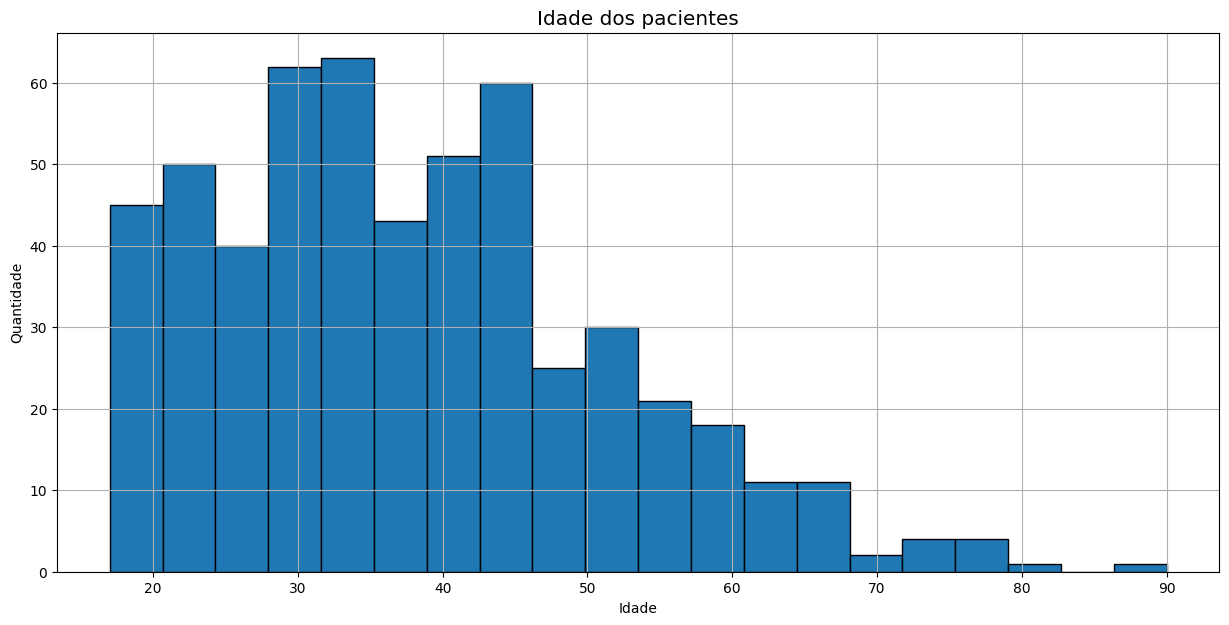

In [35]:
base_completa.hist(
    column='idade',
    figsize=(15,7),
    bins=20,
    edgecolor='black'
)

plt.style.use('ggplot')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Idade dos pacientes')
plt.show()

Elabore um gráfico de dispersão que represente a relação entre a idade e os salários de todos os pacientes, agrupados por gênero. No eixo x, represente o salário, enquanto no eixo y, represente a idade. Posteriormente, analise os resultados obtidos e selecione o gráfico que melhor ilustra essa relação.

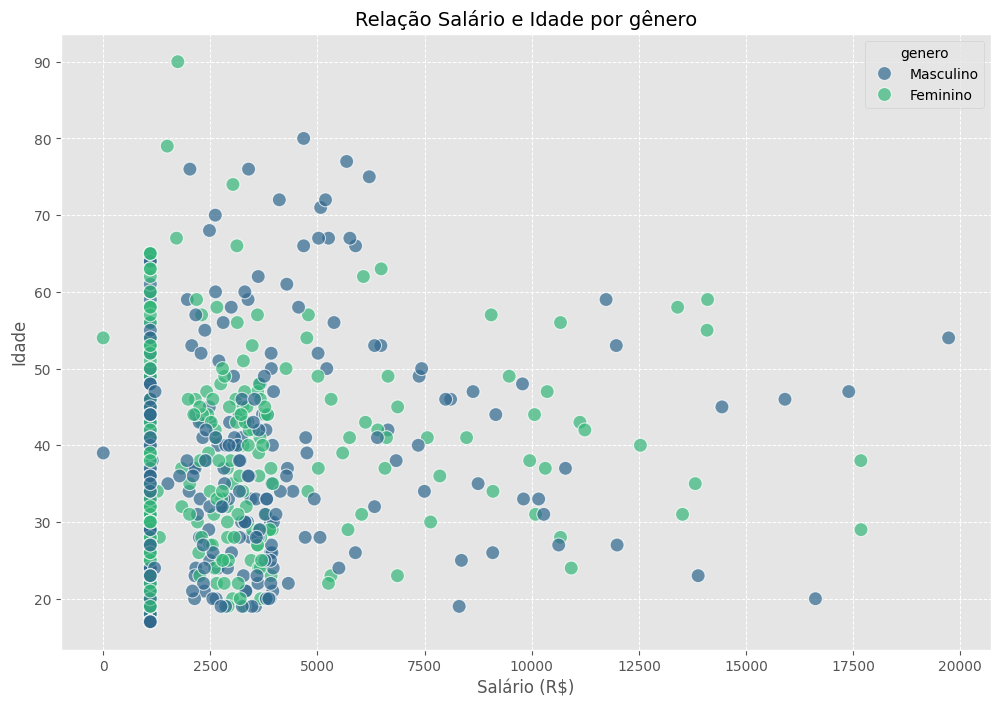

In [38]:
# Configurando o estilo do gráfico
plt.style.use('ggplot')

# Criando o gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=base_completa,
    x       = 'salario',
    y       = 'idade',
    hue     = 'genero',
    palette = 'viridis',
    s       = 100,
    alpha   = 0.7 
)

# Personalizando o gráfico
plt.xlabel('Salário (R$)', fontsize=12)
plt.ylabel('Idade', fontsize=12)
plt.title('Relação Salário e Idade por gênero', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Exibindo o gráfico
plt.show()


Qual é a média salarial para os residentes na região Nordeste?

In [44]:
# Calculando a média salarial por região
medial_salarial_por_regiao = base_completa.groupby('regiao')['salario'].mean()

# Exibe a média salarial para cada região
# Exibindo a média salarial formatada
print('Média salarial por região:\n')
for regiao, media in medial_salarial_por_regiao.items():
    print(f"Região: {regiao:<15} | Média Salarial: R$ {media:,.2f}")


Média salarial por região:

Região: Centro-Oeste    | Média Salarial: R$ 3,478.51
Região: Nordeste        | Média Salarial: R$ 3,434.85
Região: Norte           | Média Salarial: R$ 3,452.29
Região: Sudeste         | Média Salarial: R$ 2,935.68
Região: Sul             | Média Salarial: R$ 3,205.15


In [45]:
# Filtrando o Dataframe para a região Nordeste
base_nordeste = base_completa[base_completa['regiao'] == 'Nordeste']
media_salarial_nordeste = base_nordeste['salario'].mean()

print()
print(f'Média salarial do nordeste: {media_salarial_nordeste:.2f}')



Média salarial do nordeste: 3434.85


Entre os estados da região Nordeste, qual se destaca pelo maior valor na média das idades?

In [47]:
# Calculando a média das idades por estado
media_idade_por_estado = base_nordeste.groupby('estado')['idade'].mean()

# Encontrando o estado com a maior média de idade
estado_mais_velho = media_idade_por_estado.idxmax()
media_idade_maxima = media_idade_por_estado.max()

# Exibindo o resultado
print(f'O estado que se destaca é o/a {estado_mais_velho}')

O estado que se destaca é o/a Ceará


Entre todos os estados, qual deles apresenta o maior número de pacientes com grau de escolaridade 'Mestrado'?"

In [48]:
# Filtrando o Dataframe para o grau de escolaridade 'Mestrado'
base_mestrado = base_completa[base_completa['escolaridade'] == 'Mestrado']

# Contando o número de pacientes por estado
#contagem_por_estado_BC = base_completa[base_completa['escolaridade'] == 'Mestrado']['estado'].value_counts()
contagem_por_estado = base_mestrado['estado'].value_counts()

# Encontrando o estado com o maior número de pacientes com mestrado
estado_com_mais_mestrados = contagem_por_estado.idxmax()
numero_mestrados_maximo = contagem_por_estado.max()

# Exibe o resultado
print(f'O estado com o maior número de pacientes com grau de escolaridade \'Mestrado\' é {estado_com_mais_mestrados} com {numero_mestrados_maximo} pacientes.')

O estado com o maior número de pacientes com grau de escolaridade 'Mestrado' é Santa Catarina com 5 pacientes.


Elabore o gráfico de WCSS (Within-Cluster Sum of Squares) com as variáveis peso e colesterol para um conjunto de 10 clusters. Após examinar os dados no gráfico, responda: qual é o valor de WCSS para o cluster de número 3? Leve em consideração apenas os três primeiros dígitos apresentados no gráfico.

Além disso, leve em consideração a seguintes configurações:

In [49]:
def calcular_wcss(dados_clientes):
    wcss=[]
    for k in range(1,11):
        kmeans = KMeans(
            n_clusters= k,
            random_state= 42,
            init='k-means++',
            n_init= 10
        )
        kmeans.fit(dados_clientes)
        wcss.append(kmeans.inertia_)
    return wcss

In [50]:
dados_cliente = base_completa[['peso', 'colesterol']]
dados_cliente.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,140.0,167
4,130.0,158


In [51]:
wcss_clientes = calcular_wcss(dados_cliente)

In [53]:
# Visualizando os dados obtidos no wcss
for i in range(len(wcss_clientes)):
    print(f'O valor do wcss é de {wcss_clientes[i]:.2f} no cluster {i}')

O valor do wcss é de 1345138.98 no cluster 0
O valor do wcss é de 326459.17 no cluster 1
O valor do wcss é de 138693.05 no cluster 2
O valor do wcss é de 80254.75 no cluster 3
O valor do wcss é de 53121.82 no cluster 4
O valor do wcss é de 37038.61 no cluster 5
O valor do wcss é de 27291.87 no cluster 6
O valor do wcss é de 21793.60 no cluster 7
O valor do wcss é de 17008.11 no cluster 8
O valor do wcss é de 14624.48 no cluster 9


<span style="font-size:20px; color:#FFDF00; font-weight:bold;">Gráfico cotovelo</span>


In [54]:
grafico_wcss = px.line(
    x = range(1,11),
    y = wcss_clientes
)

fig = go.Figure(grafico_wcss)

fig.update_layout(
    title = 'Calculando o WCSS',
    xaxis_title = 'Número de Clusters',
    yaxis_title = 'Valor do WCSS',
    template = 'plotly_white'
)

fig.show()

Produza uma representação gráfica da formação de 3 clusters com base no peso e colesterol dos clientes nos eixos x e y, respectivamente. Posteriormente, selecione a imagem que melhor reflete esse agrupamento. Utilize as configurações conforme a imagem.

In [55]:
kmeans_paciente = KMeans(
    n_clusters= 3,
    random_state= 42,
    init='k-means++',
    n_init= 10
)

In [56]:
# Ajustando o modelo aos dados
kmeans_paciente.fit(dados_cliente)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [57]:
# Adicionando os labels ao Dataframe original
base_completa['cluster'] = kmeans_paciente.fit_predict(dados_cliente)

<span style="font-size:20px; color:#FFDF00; font-weight:bold;">Visualizando os Clusters</span>


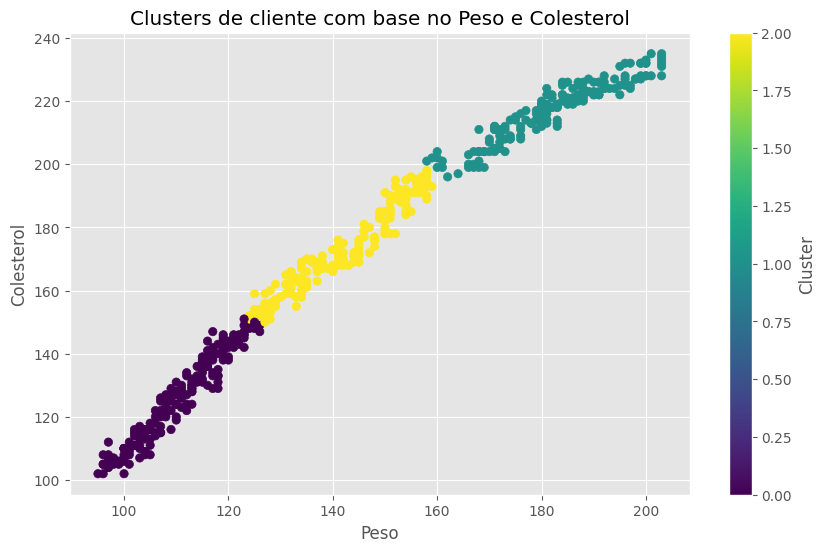

In [58]:
# Visualizando os clusters
plt.figure(figsize=(10,6))
plt.scatter(
    dados_cliente['peso'],
    dados_cliente['colesterol'],
    c = kmeans_paciente.labels_,
    cmap= 'viridis'
)

plt.xlabel('Peso')
plt.ylabel('Colesterol')
plt.title('Clusters de cliente com base no Peso e Colesterol')
plt.colorbar(label='Cluster')
plt.show()

<span style="font-size:20px; color:#FFDF00; font-weight:bold;">Centróides</span>


In [59]:
# Obtendo os centróides dos clusters
centroides = kmeans_paciente.cluster_centers_

In [60]:
# Exibindo os centróides
print('Centróides dos Clusters:')
print(centroides)

Centróides dos Clusters:
[[110.32804233 125.75661376]
 [182.18934911 217.        ]
 [141.86413043 173.10326087]]


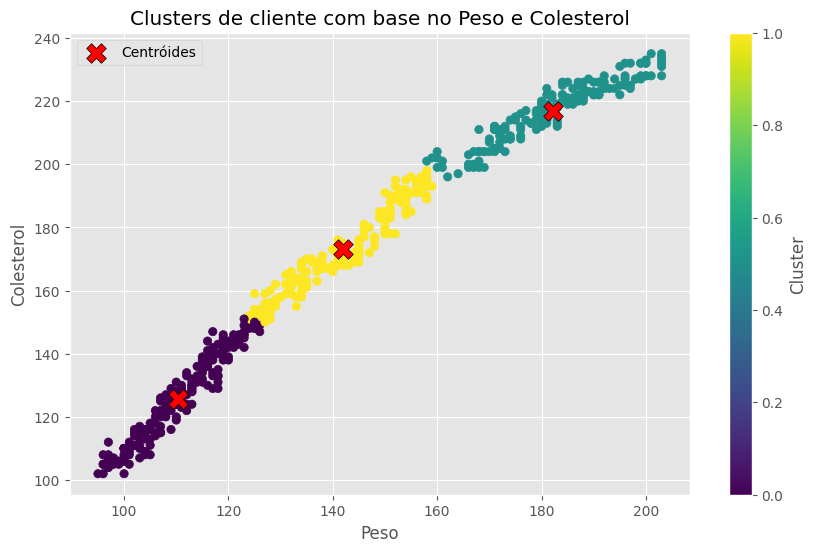

In [61]:
# Visualizando os clusters
plt.figure(figsize=(10,6))
plt.scatter(
    dados_cliente['peso'],
    dados_cliente['colesterol'],
    c=kmeans_paciente.labels_,
    cmap='viridis'
)

# Adicionando os centróides ao gráfico
plt.scatter(
    centroides[:, 0],  # Coordenadas x (Peso)
    centroides[:, 1],  # Coordenadas y (Colesterol)
    s=200,             # Tamanho dos pontos dos centróides
    c='red',           # Cor dos centróides
    marker='X',        # Formato do marcador
    edgecolor='black', # Cor da borda dos centróides
    label='Centróides'
)

# Personalizando o gráfico
plt.xlabel('Peso')
plt.ylabel('Colesterol')
plt.title('Clusters de cliente com base no Peso e Colesterol')
plt.colorbar(label='Cluster')
plt.legend()  # Mostra a legenda com os centróides
plt.grid(True)

# Exibe o gráfico
plt.show()


<span style="font-size:20px; color:#FFDF00; font-weight:bold;">Gráfico Interativo com os centróides</span>


In [63]:
# Gráfico de dispersão para os pontos dos clusters
grafico = px.scatter(
    x=base_completa['peso'],
    y=base_completa['colesterol'],
    color=base_completa['cluster'],
    labels={'x': 'Peso', 'y': 'Colesterol'},
    title='Clusters de Clientes com Base no Peso e Colesterol'
)

# Gráfico de dispersão para os centróides
grafico_centroide = go.Scatter(
    x=centroides[:, 0],
    y=centroides[:, 1],
    mode='markers',
    marker=dict(
        size=14,
        color='red',
        symbol='x',
        line=dict(width=2, color='black')
    ),
    name='Centróides'
)

# Combina os dois gráficos
grafico_final_petala = go.Figure(
    data=list(grafico.data) + [grafico_centroide]
)

# Personalizações adicionais
grafico_final_petala.update_layout(
    xaxis_title='Peso',
    yaxis_title='Colesterol',
    title='Clusters de Clientes com Base no Peso e Colesterol',
    legend_title='Cluster'
)

# Exibe o gráfico
grafico_final_petala.show()


In [65]:
# Ordenando os clusters com base nos centroides (peso + colesterol)
indices_ordenados = np.argsort(np.sum(centroides, axis=1))

# Mapeando os clusters para os grupos de risco
mapa_risco = {
    indices_ordenados[0]: 'Baixo risco',
    indices_ordenados[1]: 'Risco moderado',
    indices_ordenados[2]: 'Alto risco'
}

# Adicionando a coluna de risco ao Dataframe
base_completa['risco'] = base_completa['cluster'].map(mapa_risco)

# Exibindo o Dataframe com a segmentação
print(base_completa[['peso', 'colesterol', 'cluster', 'risco']].head())

    peso  colesterol  cluster           risco
0  102.0         111        0     Baixo risco
1  115.0         135        0     Baixo risco
2  115.0         136        0     Baixo risco
3  140.0         167        2  Risco moderado
4  130.0         158        2  Risco moderado


Após concluir a clusterização dos dados, responda: em qual cluster se encontra o maior número de indivíduos?

Após concluir a clusterização dos dados, responda: qual é a média do peso para os pacientes do risco alto?

Após concluir a clusterização dos dados, responda: qual é o grupo que possui a menor média de idade?

Após concluir a clusterização dos dados, responda: qual é o grupo que possui a menor média de salário?